## Title: Group 1's Final Report for KNN model to predict Raisin class using classification and comparison with other classification models

## Introduction 

Our research seeks to answer the question of identifying the classification of raisins given our data set(source). We will be using KNN K nearest neighbors classification algorithm in our project. We will be relying on (source) (literature already done and researched using SVM, ML and other methods) as a benchmark of our performance. We will analyze how the use of data given will influence or impact the results of classification, accuracy, and other performance metrics will be analyzed. With our results we will be comparing the usefulness of our methods and analysis using performance metrics against (source) (Gazi Mühendislik Bilimleri Dergisi). We will also determine which combination of sets of predictors from our given dataset produce the most accurate results, i.e. how much influence each data column has on predicting accurately the class of the raisin. We will perform cross validation to ensure greatest accuracy and minimal error in stratifying our training and validation subset and measure the error in our analysis. Our dataset consists of 8 columns: Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, Extent, Perimeter, and Class. The Area column describes the number of pixels that compose the total raisin area. The MajorAxisLength and MinorAxisLength columns describe the length of the longest and shortest lines that can be drawn on the raisin shape, respectively. The Eccentricity column gives a measure of the eccentricity of the ellipse of the raisin. The Perimeter column measures the length of the pixels going around the raisin (raisin outline length). The ConvexArea gives the number of pixels of the smallest convex shell formed by the raisin. Finally, the Extent column gives the ratio of the raisin area to the total pixels in the bounding box.

Source Citation in APA: 

ÇINAR İ̇lkay, KOKLU, M., &amp; TAŞDEMİR, Ş. (2020). (Classification of Raisin Grains Using Machine Vision and Artificial  Intelligence Methods) Kuru üzüm Tanelerinin Makine Görüşü ve Yapay Zeka yöntemleri Kullanılarak Sınıflandırılması. Gazi Journal of Engineering Sciences, 6(3), 200–209. https://doi.org/10.30855/gmbd.2020.03.03 

In [2]:
# downloading libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)
library(broom)
library(scales)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Preliminary exploratory data analysis:

#### 1. Demonstrating that the dataset can be read from the web into R 

In [4]:
raisin_data <- read_csv("https://github.com/dylankim990/DSCI100_Group_1/raw/main/data/Raisin_Dataset.csv") %>% 
    mutate(Class = as_factor(Class))

Parsed with column specification:
cols(
  Area = col_double(),
  MajorAxisLength = col_double(),
  MinorAxisLength = col_double(),
  Eccentricity = col_double(),
  ConvexArea = col_double(),
  Extent = col_double(),
  Perimeter = col_double(),
  Class = col_character()
)



#### 2. Clean and wrangle your data into a tidy format

Wrangling to tidy the data was not neccesary since they were in a tidy format.

In [5]:
head(raisin_data)
print('Table 1: top six rows of raisin data')

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen


[1] "Table 1: top six rows of raisin data"


#### 3. Summarizing the data 
The below tibble shows that there are exactly 450 Besni raisins and 450 Kecimens. This finding shows that the proportion of classes is balanced.

In [8]:
set.seed(5805)
# the number of observations in each class
obs_num_class <- raisin_data %>%
    group_by(Class) %>%
    summarize(num_obs = n())

obs_num_class
print('Table 2: top six rows of raisin data')

`summarise()` ungrouping output (override with `.groups` argument)



Class,num_obs
<fct>,<int>
Kecimen,450
Besni,450


[1] "Table 2: top six rows of raisin data"


The below tibble shows the means of the predictor variables.

In [7]:
# the means of the predictor variables you plan to use in your analysis
means_predictors <- raisin_training %>%
    select(-Class) %>%
    map_df(mean)

means_predictors   

ERROR: Error in eval(lhs, parent, parent): object 'raisin_training' not found


The below tibble shows that there are no NA data.

In [100]:
#c) counting how many rows have missing data. 
num_of_na <- colSums(is.na(raisin_training))

num_of_na

Area MajorAxisLength MinorAxisLength    Eccentricity      ConvexArea 
              0               0               0               0               0 
         Extent       Perimeter           Class 
              0               0               0

#### 4. Visualizing the data 

Firstly, we started off by making a ggpairs visualization in order to be able to build a scatterplot matrix. With this, we would be able to visualize (within a single diagram) each pair of numeric variables and the way they interact with each other, with the Pearson correlation and variable distribution also clearly stated. This was done in order to gain a deeper understanding of the data and it also allowed us to be able to identify correlations and different kinds of relationships between the variables. However, one flaw was that this would no allow us to know what type (Class) of raisin were plotted, it was simply plotting all the numerical data in the dataset (no distinction between Class). So, after we did some data analysis and prime predictor identification, we found that the predictors that would provide the most accurate predictions were Area, Perimeter, and Eccentricity. Now that we knew this, we decided to proceed and create scatterplots of the relatinoships and correlations between these specific three variables. This was done to gain an even better understanding of the variables that would become our predictors, while at the same time being able to identify what type of raisin (Class) was being plotted and what differences the types of raisins had in regards to these variables. To do this, we utilized the ggplot() function and since there were only three predictor variables, we were able to create scatterplots for each posible combination of two variables: Area v Perimeter, Area v Eccentricity, and Perimeter v Eccentricity. It was a crucial step in this process to scale all the variabels (especially for ggpairs correlation plot) because the value ranges for every column are extremely different (some in the 1000s, some less than 1). In order for our correlation/ggpairs plot and our scatter plots to not be visually misleading, we scaled the data utilizing the "scale_x_continuous" and "scale_y_continuous" functions for the scatter plot and added different aesthetic functions to the ggpairs overall function so that our graph would be clear.

Some identifiable differences found in the scatter plots between our most accurate predictors, Area, Perimeter, and Eccentricity, is that all of them show the Besni raisin type to generally be larger in area/perimeter/eccentricity than the Kecimen raisin. Another important factor to note is that all these scatter plots show a positive correlation, with the area v perimeter scatter plot having a very strong positive correlation, the strongest of all graphs. In this scatter plot, there is almost an obvious shift from Kecimen to Besni raisin types as area and perimeter increases, this elades us to believe that Besni raisins are typically larger than Kecimen raisins.

In [3]:
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 12, repr.plot.width = 12)
options(scipen = 999)

# seed value
set.seed(5805)

# ggpairs
scaled_raisin_data <- raisin_data %>%
    select(Area:Perimeter) %>%
    mutate(across(everything(), scale))

raisin_data_predictors <- raisin_data %>%
    select(Area:Perimeter)

raisin_pairs <- raisin_data_predictors %>%
    ggpairs(., lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1))) + 
    theme(text = element_text(size = 15)) +
theme(axis.text.x = element_text(angle =45, hjust = 1))
print("Figure 1: Correlation mapping for every predictor")
raisin_pairs

ERROR: Error in eval(lhs, parent, parent): object 'raisin_data' not found


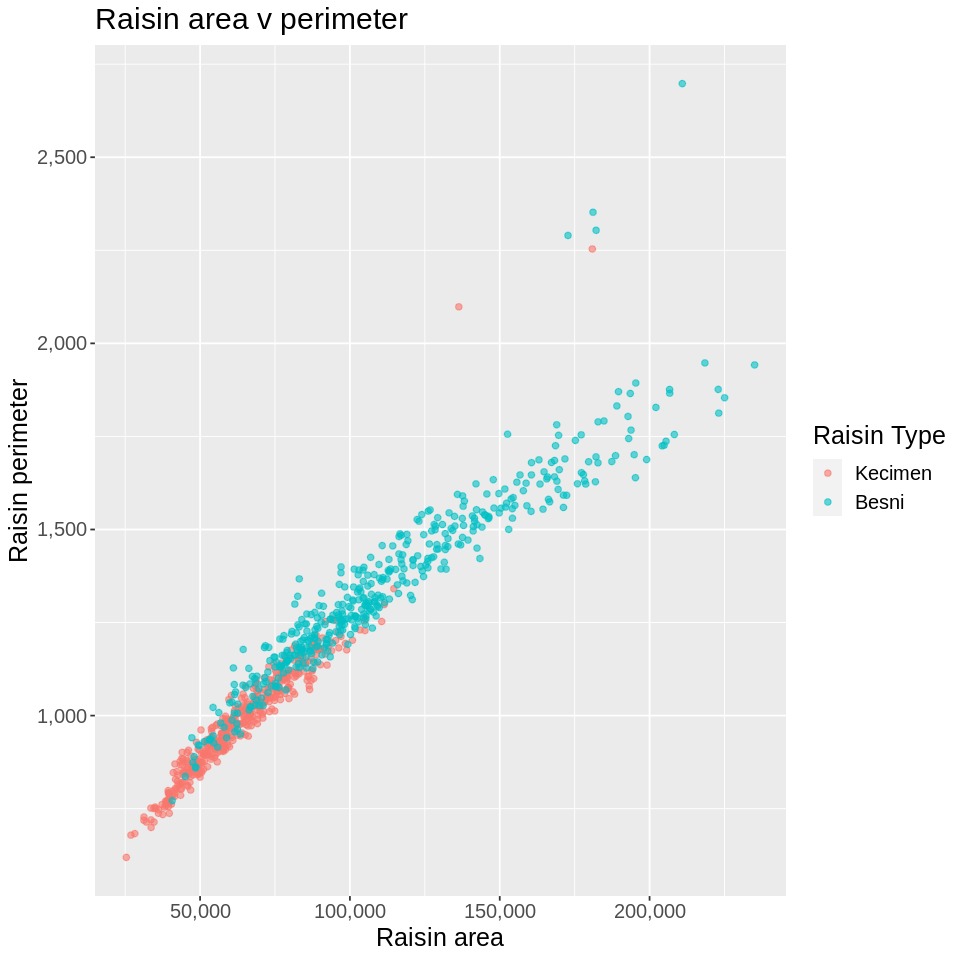

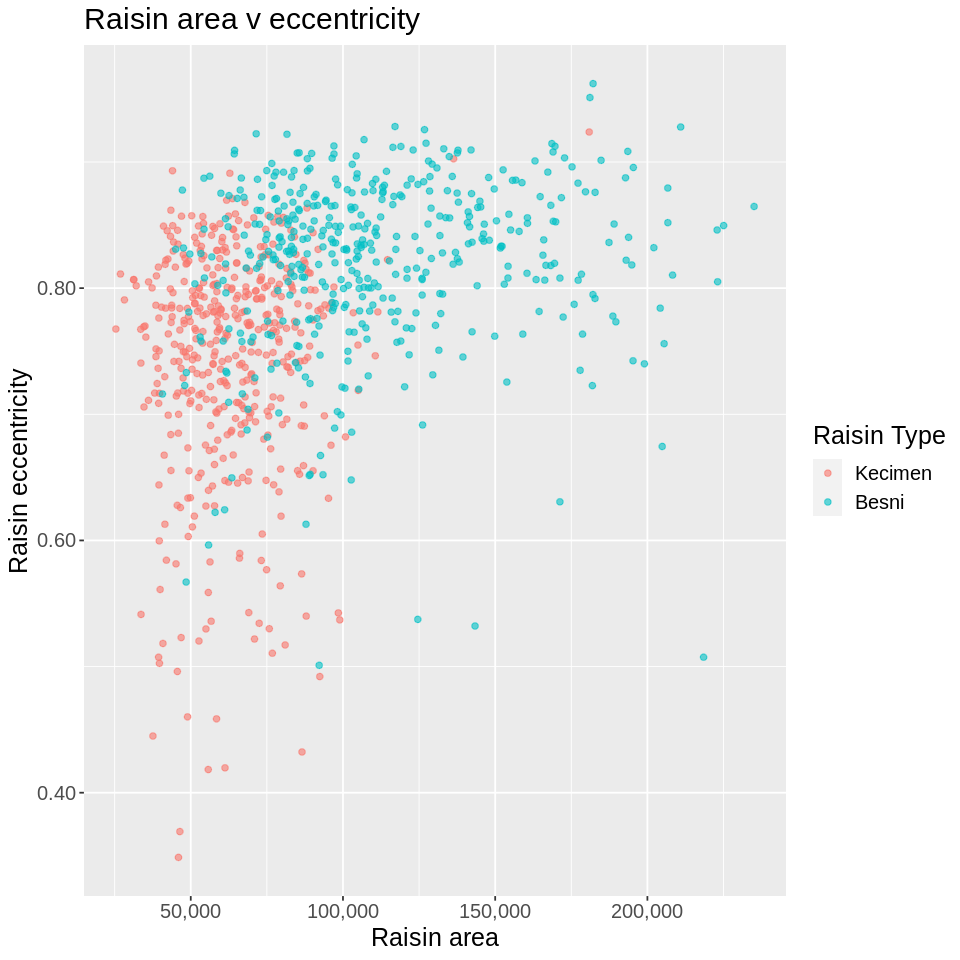

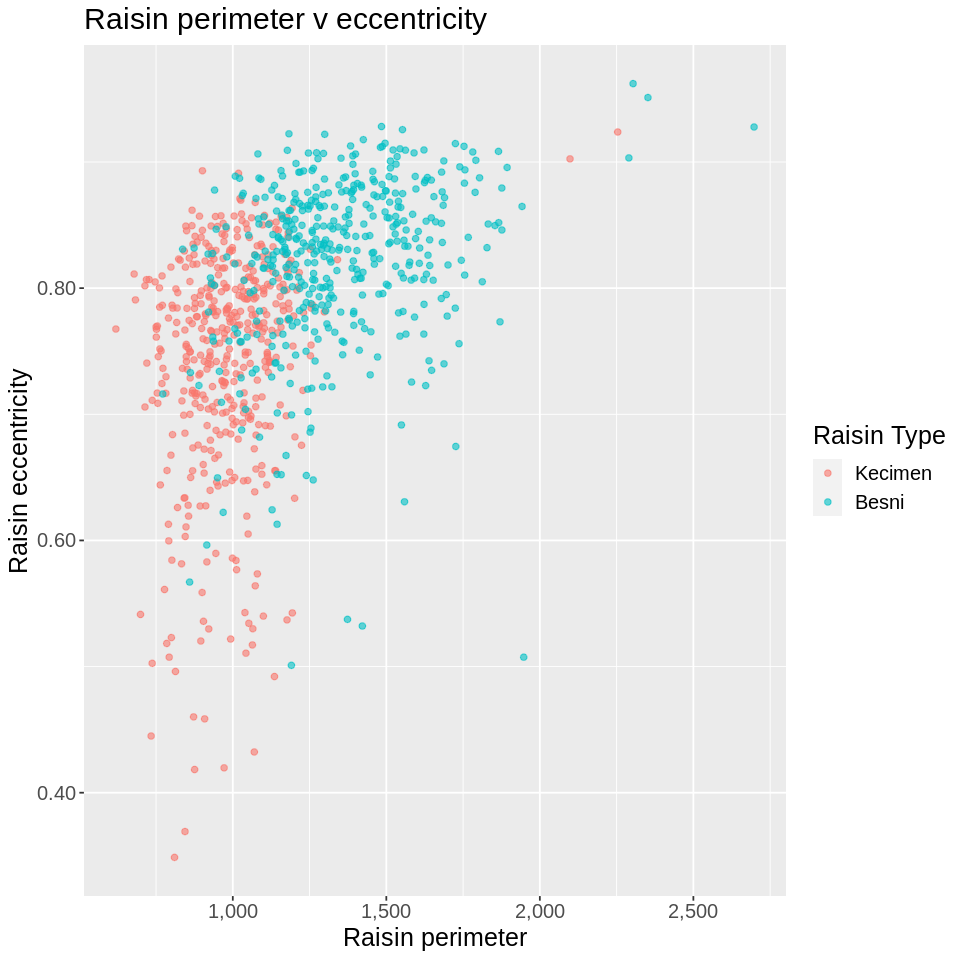

In [102]:
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 8, repr.plot.width = 8)


# setting seed
set.seed(5805)

# scatter plot: Area v Perimeter
area_perimeter_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Perimeter, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin perimeter", 
         title = "Figure 3: Raisin area v perimeter",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())

area_perimeter_plot

# scatter plot: Area v Eccentricity
area_eccentricity_plot <- raisin_data %>%
    ggplot(aes(x = Area, y = Eccentricity, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin area", 
         y = "Raisin eccentricity", 
         title = "Figure 4: Raisin area v eccentricity",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())


area_eccentricity_plot 


# scatter plot: Perimeter v Eccentricity 
perim_eccentricity_plot <- raisin_data %>%
    ggplot(aes(x = Perimeter, y = Eccentricity, color = Class)) + 
    geom_point(alpha = 0.6) + 
    labs(x = "Raisin perimeter", 
         y = "Raisin eccentricity", 
         title = "Figure 5: Raisin perimeter v eccentricity",
         color = "Raisin Type") +
    theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())



perim_eccentricity_plot

We can clearly see that from the distrubtion certain predictors such as Area, Perimeter, Major Axis Length are skewed for Bensi and have a distribution of greater values than Keciman. We can use this to our advantage and choose predictors that clearly have different characteristics between the two classes. As for predictors such as Extent, we may not find it helpful in our research into the classifcation of a raisen based on this characteristic as the distribution of the predictors is not skewed differently for each of the classes. A good example of a predictor we may use is, Area, there is greater positive skewness for Bensi and the Mode is of greater value in Area than of Keciman. In the dicussion of Area, we see that Keciman has a mode that is lesser of value than of Bensi, we also see a more normal distribution for Keciman than Bensi which has a positive skewness. Therefore in determining effective predicators we will definately include Area in our list of predictors as to influence our accuracy. We can also look at our correlation matrix above and take note that, "Extent which we have determined is not a reliable predictor in classifcation has very loose correlation between the other set of predictors. We also take note that Area which we have determined is a reliable predictor given its differentiating characteritics between the two classes has strong correlation between the other set of predictors except Extent. Strong correlation of Area and the other set of predictors means we may also include the other predictors in our classification. As an increase in area takes place, Major Axis Length and a number of other predictors will also increase, a correlation of above 0.7 (70%) is noticed between Area, Major Axis Length, Minor Axis Length and Perimeter. Eccenticity and Extent are loosely correlated with Area, which we will analyze and take into consideration to exclude or include in our final set of predictors for our classification model. Given the correlation matrix and distrubition plot, we can more clearly see which set of predictors will result in greater accuracy by vizualation the data set. We may exlude Eccentricity and Extent for lack of differentiating characteristics between the two classes, and weak correlation against the other set of predictors. We may choose to include Area, Major Axis Length, Minor Axis Length, and Perimeter for our final set of predictors, due to their differentiating characteristics between the two classes and strong correlation, which means they would perform will in their use as predictors.

[1] "Peak Distribution Values"


,name,value
,<chr>,<dbl>
1,Area,87524.0000000
2,MajorAxisLength,442.2460114
3,MinorAxisLength,253.2911550
4,Eccentricity,0.8197384
5,ConvexArea,90546.0000000
6,Extent,0.7586506


[1] "Distribution plot"


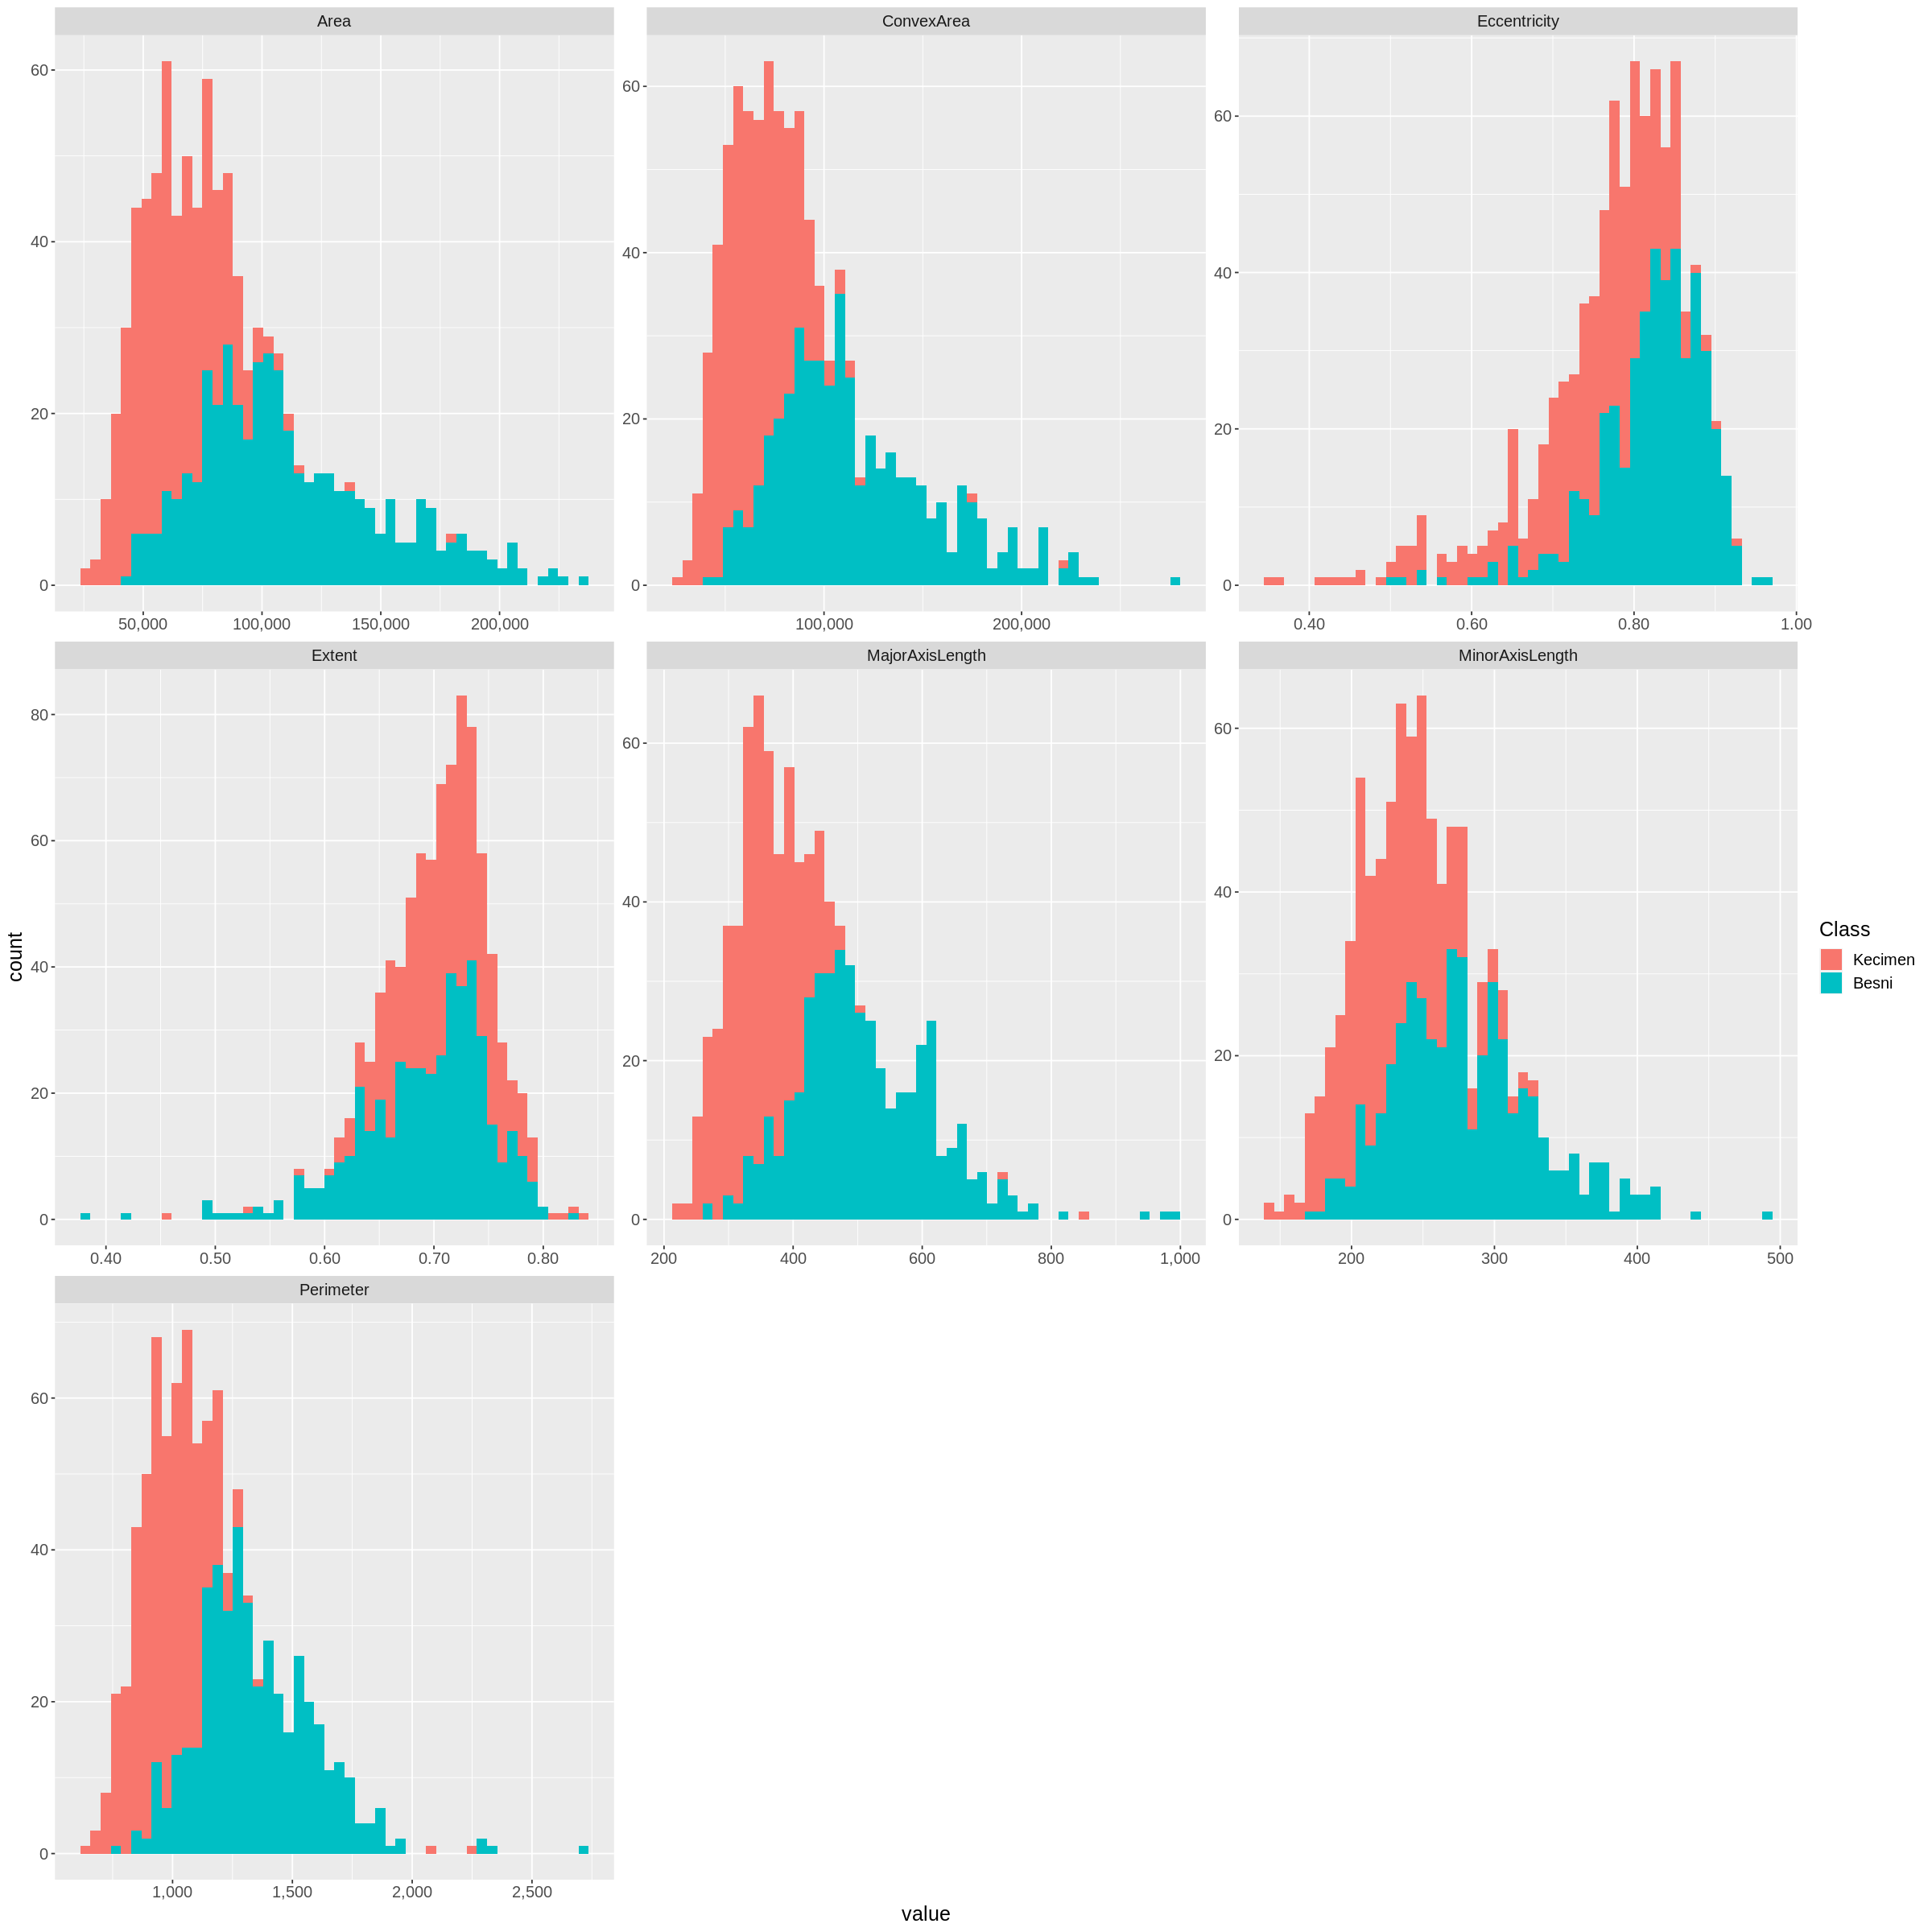

In [90]:
library(ggplot2)
library(tidyr)
# options(repr.matrix.max.rows = 6)
options(repr.plot.height = 20, repr.plot.width = 20)

# setting seed
set.seed(5805)

raisin_data_long <- raisin_data %>%   
  pivot_longer(col=c("Area":"Perimeter")) %>% 
  as.data.frame()
display <-raisin_data_long %>% select(name,value)
print("Table 3: Peak Distribution Values")

head(display)


# distribution plot 
distribution_plot <- ggplot(raisin_data_long, aes(x = value, fill=Class)) +   
  geom_histogram(bins = 50)+ 
  facet_wrap(~ name, scales = "free") +
  theme(text = element_text(size = 15))+
  scale_x_continuous(labels = label_comma()) +
  scale_y_continuous(labels = label_comma())
  
print("Figure 6: Distribution plot")
distribution_plot

## Main Data Analysis: 

#### 1. Choosing columns using forward selection 

Before finding K through cross-validation, we will be using forward selection to find the best combination of predictors that performs high accuracy rates. For efficiency, our second goal was not to increase the number of predictors for small gain in accuracy. Since selecting predictors is a part of tuning my classifier, we have only used training dataset for the process. Below is the codes. There are two forloops. First one increases the predictor set sizes and the second one selects which predictor to add, by checking which one gives the best accuracy rate. For each combination of predictors, the loop created a recipe, with scaling, and inserted into a workflow to tune the K-NN classifier using 5-fold cross-validation. The recipe() and scaled/centered data was needed since the columns had different measurements.

Then, we have visualized the Number of Predictors against Estimated Accuracy. The combination of the two predictors:  Perimeter and Eccentricity was selected. Although the combination of three predictor, which also includes Area, had less than a 0.005 accuracy higher, but we found that such small increase in accuracy is not worth increasing the complexity of increasing number of predictors. 

size,model_string,accuracy
<int>,<chr>,<dbl>
1,Class ~ Perimeter,0.8562774
2,Class ~ Perimeter+Eccentricity,0.8651010
3,Class ~ Perimeter+Eccentricity+Area,0.8696444
4,Class ~ Perimeter+Eccentricity+Area+MajorAxisLength,0.8681299
5,Class ~ Perimeter+Eccentricity+Area+MajorAxisLength+ConvexArea,0.8637182
6,Class ~ Perimeter+Eccentricity+Area+MajorAxisLength+ConvexArea+Extent,0.8651229
7,Class ~ Perimeter+Eccentricity+Area+MajorAxisLength+ConvexArea+Extent+MinorAxisLength,0.8680641


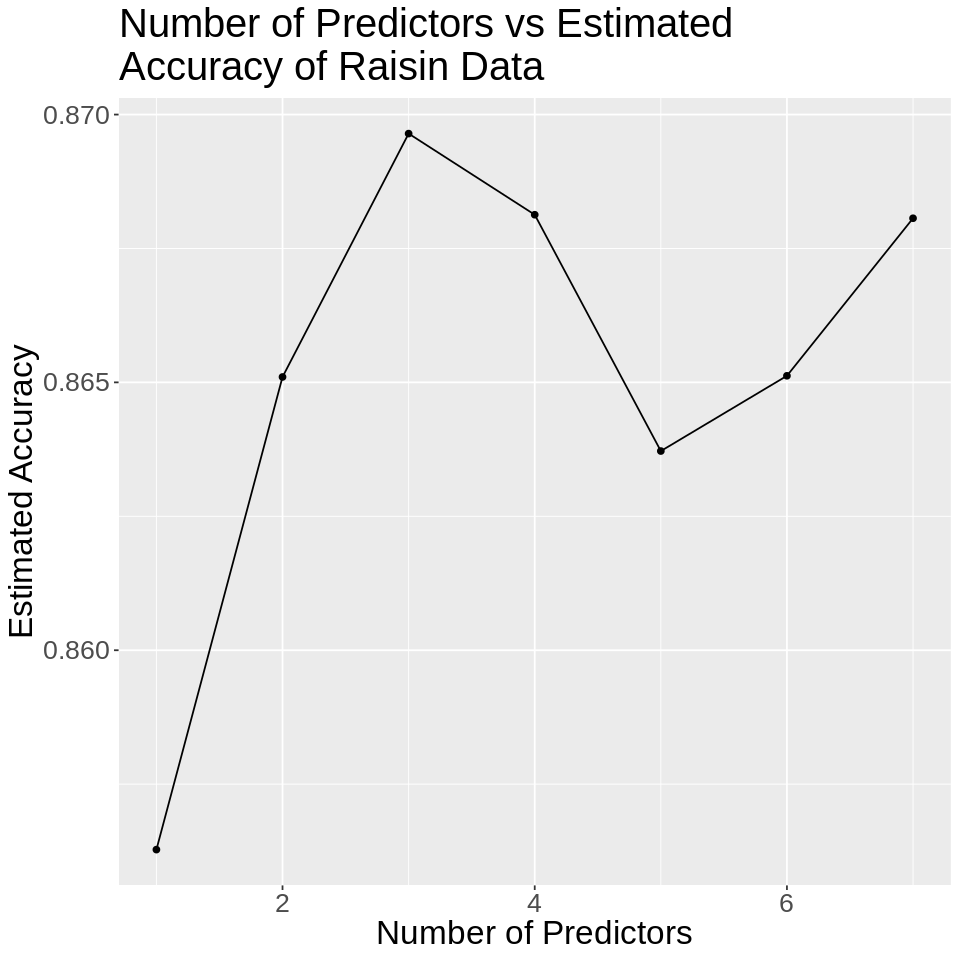

In [71]:
set.seed(5805)
raisin_split <- initial_split(raisin_data, prop = 0.75 ,strata = Class)
raisin_training <- training(raisin_split)
raisin_testing <- testing(raisin_split)

raisin_subset <- raisin_training %>%
  select(Area,
         MajorAxisLength, 
         MinorAxisLength, 
         Eccentricity, 
         ConvexArea, 
         Extent, 
         Perimeter, 
         Class)

names <- colnames(select(raisin_subset, -Class))
# creating an empty tibble which will store the accuracy results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())
# create a model 
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")
# 5-fold cross-validation
raisin_vfold <- vfold_cv(raisin_subset, v = 5, strata = Class)

# total # of predictors
n_total <- length(names)

# creating to store selected predictors
selected <- c()
#loops to try all the models
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()

#inner loop for model string for different combinations of predictors
    for (j in 1:length(names)) {
        # create a model string for the combinations of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))
        
# created a recipe from the model string
        raisin_recipe <- recipe(as.formula(model_string), 
                                data = raisin_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())
        
# tune the KNN classifier with these predictors, 
# and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(raisin_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = raisin_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

# adding the result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
        accuracies <- accuracies %>% 
          add_row(size = i, 
                  model_string = models[[jstar]], 
                  accuracy = accs[[jstar]])
        selected <- c(selected, names[[jstar]])
        names <- names[-jstar]
}
accuracies
options(repr.plot.width = 8, repr.plot.height = 8)

accuracies_plot <- ggplot(accuracies, aes(x = size, y = accuracy)) +
    geom_point() +
    geom_line() +
    labs(x = "Number of Predictors", y = "Estimated Accuracy", title = "Figure 7: Number of Predictors vs Estimated 
Accuracy of Raisin Data") +
    theme(text = element_text(size = 20))

accuracies_plot

#### 2. Choosing K using cross-validation

Since the training data was not extremely large, we have used cross-validation with 5 sets and used 1 to 30 Ks to tune the model. Prior to the vfold, we have used recipe() and scaled/centered the data since their data unit had different measurements. The selected predictors are Perimeter and Eccentricity. 
Then, with the result, We have put a visualization to portray the changing accuracy according to the number of neighbors. Through the visualization, We thought number of Ks around 9 to 17 can be justified. And K = 15 was the moderate choice, without increasing K too much. 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8134987,5,0.01217054,Model01
2,accuracy,binary,0.8134987,5,0.01217054,Model02
3,accuracy,binary,0.8313872,5,0.01453199,Model03
4,accuracy,binary,0.8313872,5,0.01453199,Model04
5,accuracy,binary,0.8520413,5,0.01421414,Model05
6,accuracy,binary,0.8520413,5,0.01421414,Model06
11,accuracy,binary,0.8549605,5,0.01687285,Model11
12,accuracy,binary,0.8549605,5,0.01687285,Model12
7,accuracy,binary,0.8550044,5,0.01450643,Model07


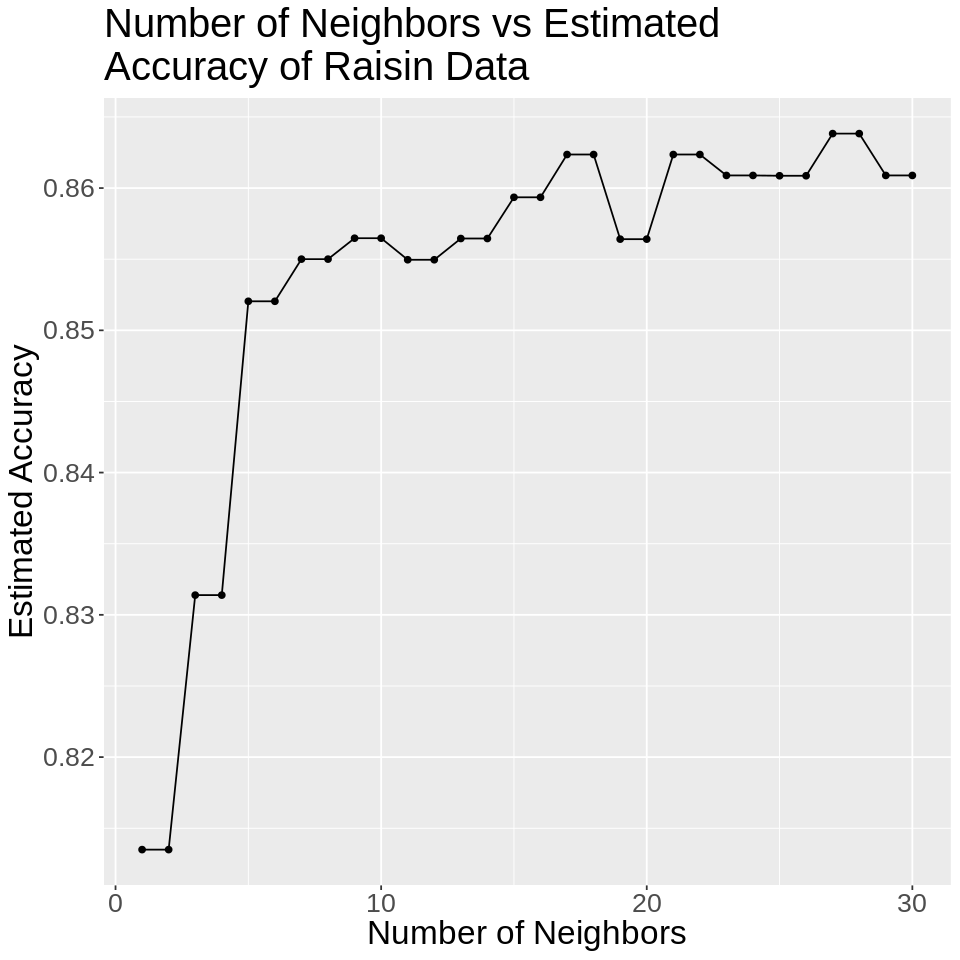

In [104]:
set.seed(5805)
raisin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

raisin_recipe <- recipe(Class ~ Perimeter + Eccentricity, data = raisin_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

onetotwenty <- tibble(neighbors = seq(1,30))
raisin_vfold <- vfold_cv(raisin_training, v = 5, strata = Class)

raisin_workflow <- workflow() %>%
    add_recipe(raisin_recipe) %>%
    add_model(raisin_spec) %>%
    tune_grid(resamples = raisin_vfold, grid = onetotwenty) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

arrange(raisin_workflow, mean)

filtered_raisin_workflow <- filter(raisin_workflow, neighbors <= 30)
ggplot(filtered_raisin_workflow, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    theme(text = element_text(size = 20)) +
    labs(x = "Number of Neighbors", y = "Estimated Accuracy", title = "Figure 8: Number of Neighbors vs Estimated 
Accuracy of Raisin Data")

print("Table 4: Accuracy table")

#### 3. Predicting results and finding accuracy on testing set

The KNN model's accuracy is 0.8616071 using perimeters of Perimeter and Eccentricity and k as 15, and the below shows the confusion matrix of the model. (evaluate the accuracy) Luckily, K = 15 resulted in higher accuracy than other nearby numbers (13,14,16,17).
In section 4, further summaries of the matrix is discussed and compared.

In [73]:
set.seed(5805)
raisin_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

raisin_workflow <- workflow() %>%
    add_recipe(raisin_recipe) %>%
    add_model(raisin_best_spec) %>%
    fit(data = raisin_training) 

raisin_result <- raisin_workflow %>%
    predict(raisin_testing) %>%
    bind_cols(raisin_testing) 

raisin_accuracy <- raisin_result %>%
    metrics(truth = Class, estimate = .pred_class) %>%
    filter(.metric == "accuracy")
raisin_accuracy

raisin_conf_mat <- raisin_result %>%
    conf_mat(truth = Class, estimate = .pred_class)
raisin_conf_mat

print("Table 5")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8616071


          Truth
Prediction Kecimen Besni
   Kecimen     101    20
   Besni        11    92

#### 4. compare the model prediction with other research model predictions

We have compared the KNN model's prediction to the raisin data and the research's models' predictions. The comparison and analysis were based on each model's performance measurements. (source) The measurements are Accuracy, Sensitivity, Specificity, Precision, F1-Score, Negative Predictive Value, False Positive Rate, False Discovery Rate, and False Negative Rate. The summary() function provided Accuracy, Sensitivity, Specificity, and Precision. Those acquired data were saved as KNN_conf_mat data frame. And we have added the missing measurements through calculations. For the calculation, tp (true positive), fp (false positive), fn (false negative), and tn (true negative) were acquired through a confusion matrix, and it was calculated according to the research's formula provided in Table 2. (source) And for KNN model, we have used all predictors as the research's models did without predictor selecting process.

We tuned the model one more time to find the optial number of K. And we found k = 15 to be reasonable. 

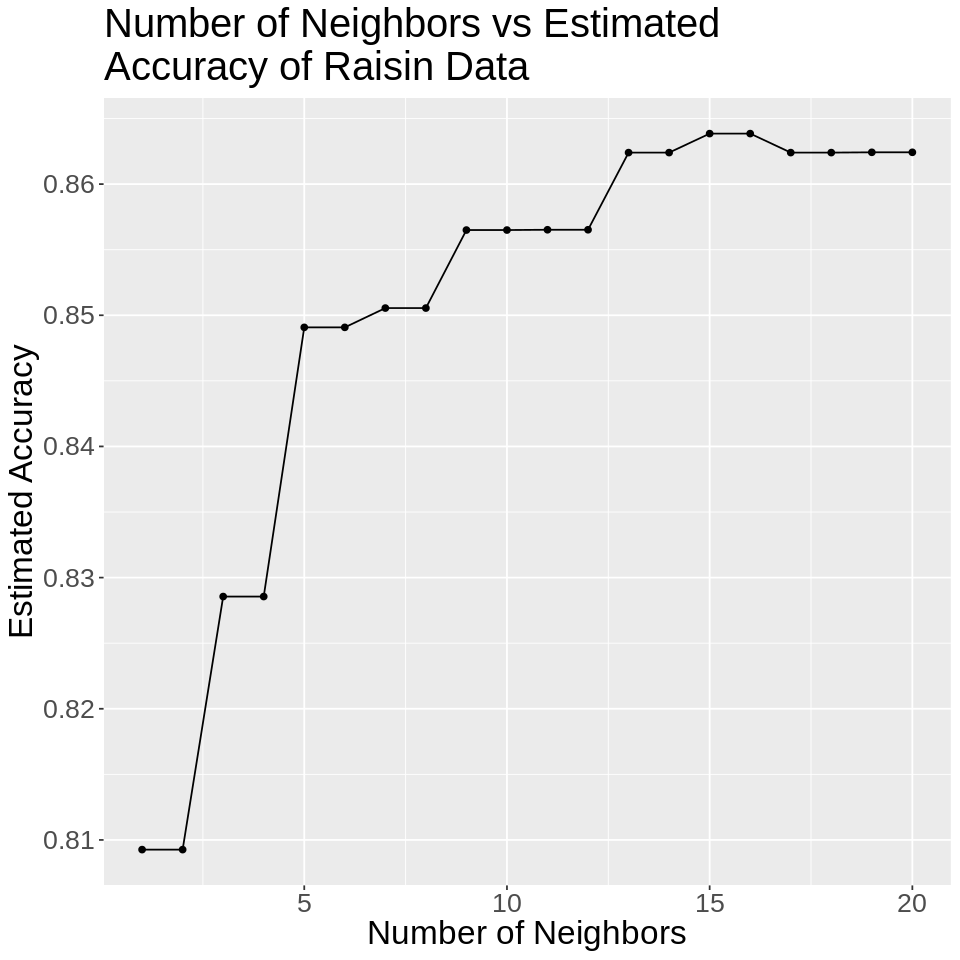

In [74]:
set.seed(5805)
raisin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

raisin_recipe <- recipe(Class ~ ., data = raisin_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

onetotwenty <- tibble(neighbors = seq(1,30))
raisin_vfold <- vfold_cv(raisin_training, v = 5, strata = Class)

raisin_workflow <- workflow() %>%
    add_recipe(raisin_recipe) %>%
    add_model(raisin_spec) %>%
    tune_grid(resamples = raisin_vfold, grid = onetotwenty) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy")

filtered_raisin_workflow <- filter(raisin_workflow, neighbors <= 20)
ggplot(filtered_raisin_workflow, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    theme(text = element_text(size = 20)) +
    labs(x = "Number of Neighbors", y = "Estimated Accuracy", title = "Figure 9: Number of Neighbors vs Estimated 
Accuracy of Raisin Data")

We trained the KNN model again with K = 15, and proceeded with the prediction and collecting the metrics. The accuracy was 0.8571429, which was lower than the previous model with predictor selection process. This supports the increased accuracy through the predictor selection process of section 1. 

Then, we have printed the confusion matrix to further proceed with formula calculations to find other metrics.

In [75]:
set.seed(5805)
raisin_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 15) %>%
    set_engine("kknn") %>%
    set_mode("classification") 

raisin_workflow <- workflow() %>%
    add_recipe(raisin_recipe) %>%
    add_model(raisin_best_spec) %>%
    fit(data = raisin_training) 

raisin_result <- raisin_workflow %>%
    predict(raisin_testing) %>%
    bind_cols(raisin_testing) 

raisin_accuracy <- raisin_result %>%
    metrics(truth = Class, estimate = .pred_class) %>%
    filter(.metric == "accuracy")
raisin_accuracy

raisin_conf_mat <- raisin_result %>%
    conf_mat(truth = Class, estimate = .pred_class)
raisin_conf_mat

print("Table 6")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8571429


          Truth
Prediction Kecimen Besni
   Kecimen      99    19
   Besni        13    93

Through the acquired tp, fp, fn, and tn, we have calculated the mising metrics from the summary(raisin_conf_mat), which were F1_Score_KNN, Negative_Predictive_Value, False_Positive_Rate
False_Discovery_Rate, and False_Negative_Rate of our KNN raisin data. And we made a new data frame with all the metrics stored accordindly. 

In [76]:
#data from raisin_conf_mat
tp <- 99
fp <- 19
fn <- 13
tn <- 93

#decided to use summary(raisin_conf_mat)
#filter and select the .metrics that also appeared on the research's performance measurements: accuracy, sens, spec, precision
KNN_conf_mat <- summary(raisin_conf_mat) %>%
    filter(.metric == "accuracy" | .metric == "sens" | .metric == "spec" | .metric == "precision") %>%
    select(.metric, .estimate) %>%
    mutate(.estimate = .estimate * 100)

#the missing metrics compared to the research is calculated according to the research's formula 
# Calculating missing values of F1_Score_KNN, Negative_Predictive_Value, False_Positive_Rate
#False_Discovery_Rate, and False_Negative_Rate of our KNN raisin data
F1_Score_KNN <- (((2*tp)/(2*tp + fp + fn)) * 100)
Negative_Predictive_Value <- ((tn / (tn + fn)) * 100)
False_Positive_Rate <- ((fp / (tn + fp)) * 100)
False_Discovery_Rate <- (fp / (tp + fp) * 100)
False_Negative_Rate <- (fn / (tp + fn) * 100)

#adding the calculated data to the KNN raisin data
KNN <- add_row(KNN_conf_mat, .metric = "F1_Score", .estimate = F1_Score_KNN) %>%
    add_row(.metric = "Negative_Predictive_Value", .estimate = Negative_Predictive_Value) %>%
    add_row(.metric = "False_Positive_Rate", .estimate = False_Positive_Rate) %>%
    add_row(.metric = "False_Discovery_Rate", .estimate = False_Discovery_Rate) %>%
    add_row(.metric = "False_Negative_Rate", .estimate = False_Negative_Rate) 

KNN <- KNN %>%
    mutate(.estimate = round(.estimate, digit = 2))
KNN

print("Table 7")

.metric,.estimate
<chr>,<dbl>
accuracy,85.71
sens,88.39
spec,83.04
precision,83.90
F1_Score,86.09
Negative_Predictive_Value,87.74
False_Positive_Rate,16.96
False_Discovery_Rate,16.10
False_Negative_Rate,11.61


We turned to the cited research and grabbed the data from it. The research used three models: LR (Logistic Regression), MLP (Multilayer Perceptron), and SVM (Support Vector Machine). (source; should I include the explanations for each model?) First, we manually input the data by reading to a dataframe named "measurements". Then, we merged the two data frames into one. To visalize the comparison, we wrangled the data. And the visualized performance measurements are Accuracy, Sensivity, Specificity, Precision, and F1_Score. Simply, the KNN showed its strength in Sensivitity, but not in other measurements. 

In [77]:
#manually inputting data frame for the Table 2 of the research 
measure_labels <- c("Accuracy", "Sensivity", "Specificity", "Precision", "F1-Score",
                    "Negative_Predictive_Value", "False_Positive_Rate", "False_Discovery_Rate",
                    "False_Negative_Rate")

measure_lr <- c(85.22, 84.09, 86.44, 86.89, 85.46, 83.56, 13.56, 13.11, 15.91)
measure_mlp <- c(86.33, 84.57, 88.29, 88.89, 86.67, 83.78, 11.71, 11.11, 15.41)
measure_svm <- c(86.44, 84.17, 89.05, 89.78, 86.88, 83.11, 10.95, 10.22, 15.83)

measurements <- tibble(performance_measure = measure_labels, LR = measure_lr, MLP = measure_mlp, SVM = measure_svm)
measurements
 
print("Table 8")

performance_measure,LR,MLP,SVM
<chr>,<dbl>,<dbl>,<dbl>
Accuracy,85.22,86.33,86.44
Sensivity,84.09,84.57,84.17
Specificity,86.44,88.29,89.05
Precision,86.89,88.89,89.78
F1-Score,85.46,86.67,86.88
Negative_Predictive_Value,83.56,83.78,83.11
False_Positive_Rate,13.56,11.71,10.95
False_Discovery_Rate,13.11,11.11,10.22
False_Negative_Rate,15.91,15.41,15.83


In [78]:
#binding our KNN data to the research's data frame and tidying the dataframe
comparison_models <- measurements %>%
    bind_cols(
        select(KNN, .estimate)) %>%
    rename(KNN = .estimate)

comparison_models

comparison_changed <- as.data.frame(t(comparison_models))

rownames(comparison_changed) <- NULL

comparison_tidy <- select(comparison_changed, V1:V9) %>%
    rename(Accuracy = V1) %>%
    rename(Sensivity = V2) %>%
    rename(Specificity = V3) %>%
    rename(Precision = V4) %>%
    rename(F1_Score = V5) %>%
    rename(Negative_Predictive_Value = V6) %>%
    rename(False_Positive_Rate = V7) %>%
    rename(False_Discovery_Rate = V8) %>%
    rename(False_Negative_Rate = V9) %>%
    mutate(Models = c("NULL", "LR", "MLP", "SVM", "KNN")) %>%
    filter(Models != "NULL")
comparison_tidy

print("Table 9 and 10")

performance_measure,LR,MLP,SVM,KNN
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Accuracy,85.22,86.33,86.44,85.71
Sensivity,84.09,84.57,84.17,88.39
Specificity,86.44,88.29,89.05,83.04
Precision,86.89,88.89,89.78,83.90
F1-Score,85.46,86.67,86.88,86.09
Negative_Predictive_Value,83.56,83.78,83.11,87.74
False_Positive_Rate,13.56,11.71,10.95,16.96
False_Discovery_Rate,13.11,11.11,10.22,16.10
False_Negative_Rate,15.91,15.41,15.83,11.61


Accuracy,Sensivity,Specificity,Precision,F1_Score,Negative_Predictive_Value,False_Positive_Rate,False_Discovery_Rate,False_Negative_Rate,Models
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
85.22,84.09,86.44,86.89,85.46,83.56,13.56,13.11,15.91,LR
86.33,84.57,88.29,88.89,86.67,83.78,11.71,11.11,15.41,MLP
86.44,84.17,89.05,89.78,86.88,83.11,10.95,10.22,15.83,SVM
85.71,88.39,83.04,83.90,86.09,87.74,16.96,16.10,11.61,KNN


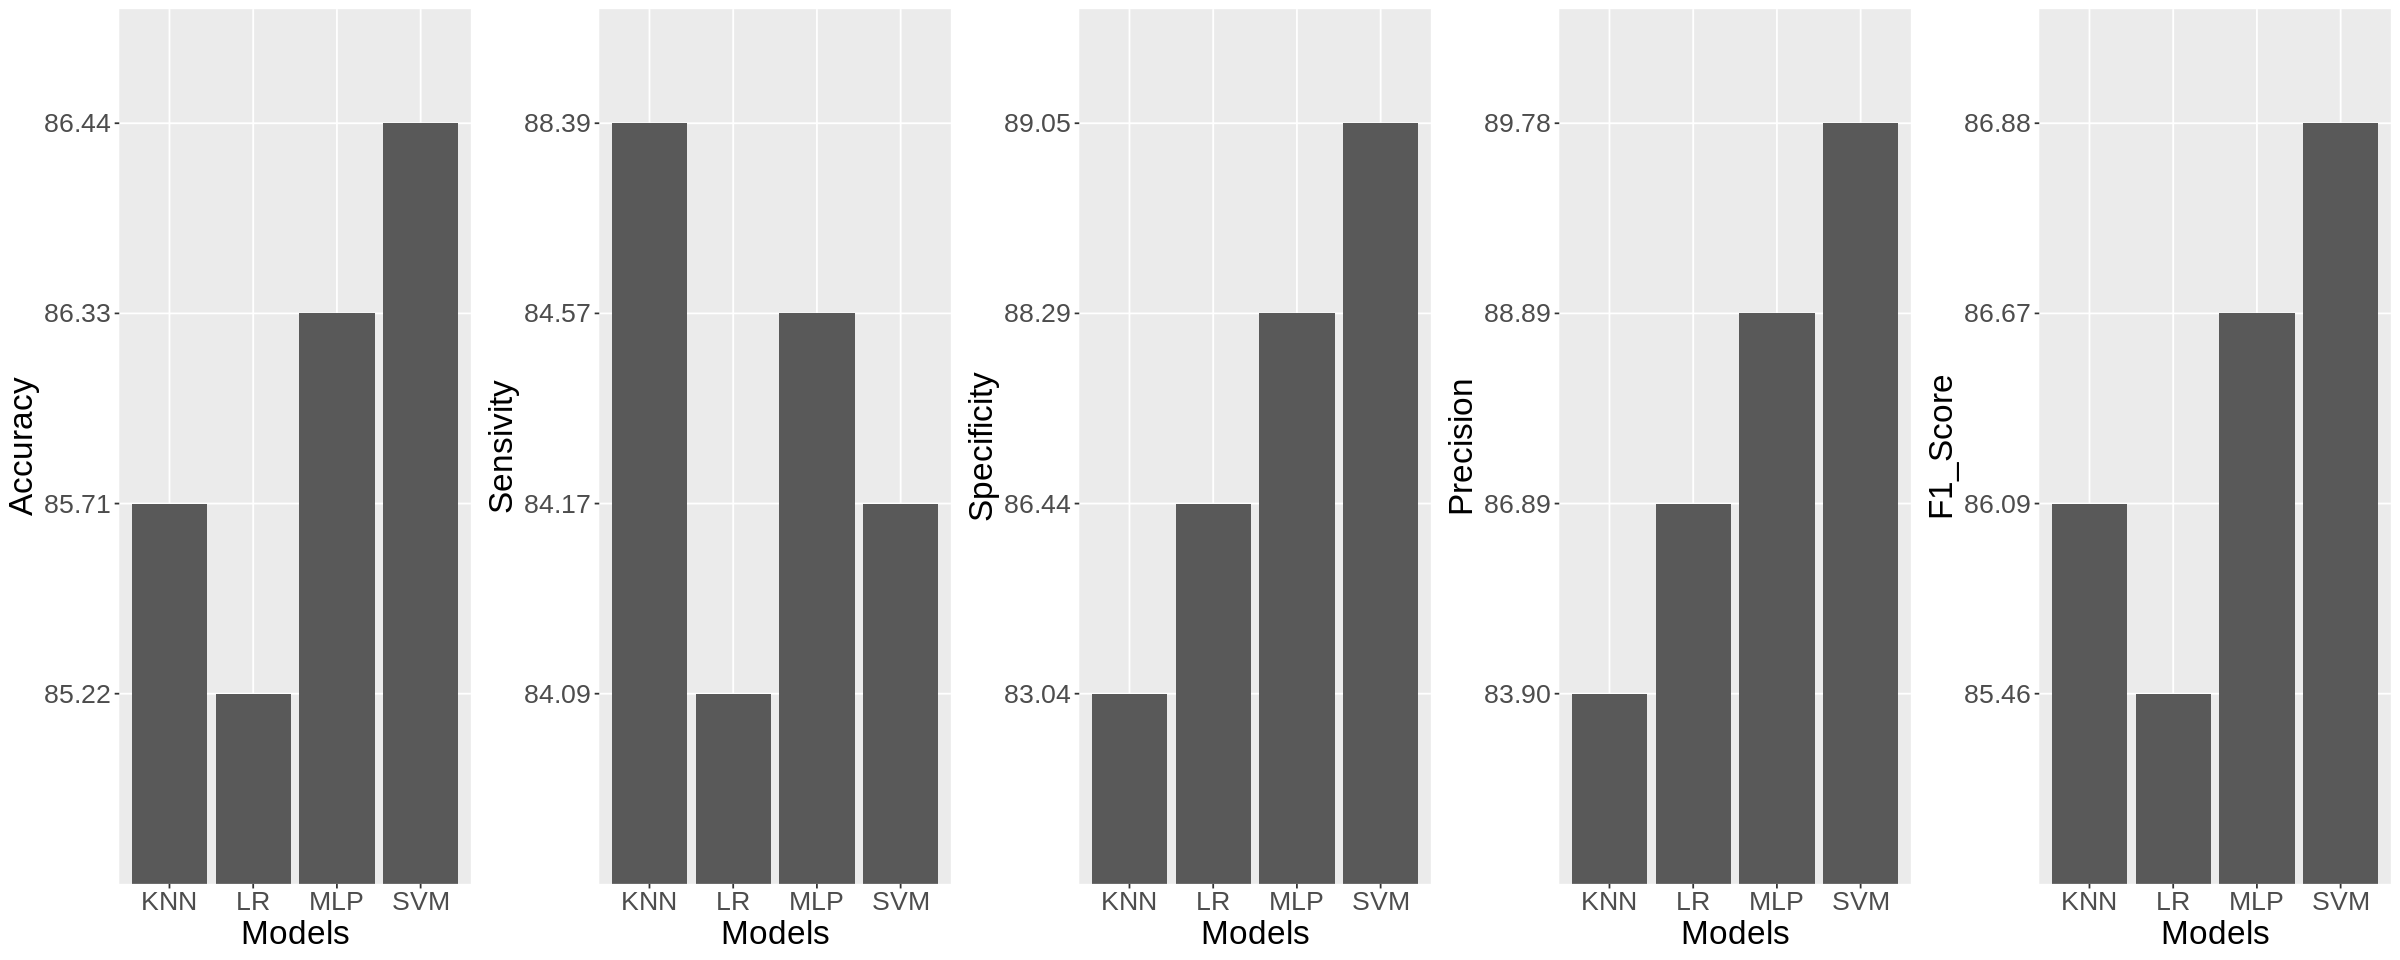

In [86]:
options(repr.plot.width = 20)

Accuracy_plot <- ggplot(comparison_tidy, aes(x = Models, y = Accuracy)) + 
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 20))

Sensivity_plot <- ggplot(comparison_tidy, aes(x = Models, y = Sensivity)) + 
    geom_bar(stat = "identity")+
    theme(text = element_text(size = 20))

Specifity_plot <- ggplot(comparison_tidy, aes(x = Models, y = Specificity)) + 
    geom_bar(stat = "identity")+
    theme(text = element_text(size = 20))

Precision_plot <- ggplot(comparison_tidy, aes(x = Models, y = Precision)) + 
    geom_bar(stat = "identity")+
    theme(text = element_text(size = 20))

F1_Score_plot <- ggplot(comparison_tidy, aes(x = Models, y = F1_Score)) + 
    geom_bar(stat = "identity")+
    theme(text = element_text(size = 20))

plot_grid(Accuracy_plot, Sensivity_plot, Specifity_plot, Precision_plot, F1_Score_plot, ncol = 5)

print("Figure 9")

## Discussion

First, we use cross-validation to determine K to calculate accuracy. We found an accuracy of 0.8303571. Second, we learned that whichever model was used did not affect the results much, because by comparing the predictions of the KNN model with the predictions of the raisin data and the study model, there was only a small difference between the results of each two models. From the scatter plot, it can be seen that Kecimen's raisin is smaller than Besin's raisin, because the points representing Kecimen's raisin are concentrated towards zero and the points representing Besin's raisin are mostly distributed in the upper right part of the figure. For Raisin's eccentricity, the data show that Kecimen has greater eccentricity but also has a distribution in the small value region In contrast, Besin's raisin has almost no low eccentricity. We actually didn’t expect such a result showing the huge differences between these two kinds of raisins. Before we started the research we thought that the data should be similar since they are both from Turkey. The result indicates that slight differences in origins (including humidity, light, precipitation, etc.) can cause huge differences between two identical products in various aspects. This difference may be too subtle but is crucial for some specific scenarios. For example, Ilkay, Murat and Sakir conducted an experiment using machine recognition to screen for raisin in 2020, in such a situation the difference between two types of raisin could be a problem. Because the machine judges only by the data it receives, maybe data that is bad grading in one type may be good grading in another. This case, combined with our results, made us wonder if we could have an algorithm that could be used to screen all data rather than just specific numerical intervals.

#### Reference

ÇINAR, İ., KOKLU, M., & TAŞDEMİR, Ş. (2020). Classification of raisin grains using machine vision and artificial intelligence methods. Gazi Mühendislik Bilimleri Dergisi, 6(3), 200-209.

Wang, J., Mujumdar, A. S., Wang, H., Fang, X. M., Xiao, H. W., & Raghavan, V. (2021). Effect of drying method and cultivar on sensory attributes, textural profiles, and volatile characteristics of grape raisins. Drying Technology, 39(4), 495-506.
